In [11]:
import matplotlib.pyplot as plt
import pandas
import pandas as pd
import seaborn as sns
import json
import os
import deepsig
from IPython.display import display

In [12]:
def convert_to_json_of_arrays(array_of_jsons):
    json_of_arrays = {}

    # Iterate through each JSON in the array
    for json_obj in array_of_jsons:
        for key, value in json_obj.items():
            # Check if the key exists in the new JSON, if not, create an array
            if key not in json_of_arrays:
                json_of_arrays[key] = []

            # Append the value to the corresponding array
            json_of_arrays[key].append(value)

    return json_of_arrays

In [13]:
def read_csv_files_from_folder(folder_path):
    # Initialize an empty list to store DataFrames
    dfs = []

    # Get a list of files in the folder
    file_list = os.listdir(folder_path)

    # Iterate through the files in the folder
    for file_name in file_list:
        # Check if the file has a .csv extension
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Append the DataFrame to the list
            dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)

    return combined_df

In [14]:
def read_json_files_from_folder(folder_path):
    json_list = []

    # Get a list of files in the folder
    file_list = os.listdir(folder_path)

    # Iterate through the files in the folder
    for file_name in file_list:
        # Check if the file has a .json extension
        if file_name.endswith(".json"):
            file_path = os.path.join(folder_path, file_name)

            # Read the contents of the JSON file
            with open(file_path, "r") as file:
                try:
                    # Parse the JSON data and append it to the list
                    json_data = json.load(file)
                    json_list.append(json_data)
                except json.JSONDecodeError:
                    # Handle parsing errors, if any
                    print(f"Error parsing JSON from file: {file_name}")

    return json_list

In [15]:
cols = ['dataset', 'method', 'fitness_rule', 'fitness', 'ACC', 'MCC', 'f1_score', 'avg_odds_diff', 'stat_par_diff', 'eq_opp_diff']

In [20]:
results = read_csv_files_from_folder('results')
results.replace({'ftl_mlp_initializer': 'Fair Transition Loss', 'adversarial_debiasing_initializer': 'Adversarial Debiasing', 'gerry_fair_classifier_initializer': 'Gerry Fair Classifier', 'prejudice_remover_initializer': 'Prejudice Remover', 'simple_mlp_initializer': 'Standard MLP (baseline)'}, inplace=True)
results.replace({'adult_dataset_reader': 'Adult Income', 'compas_dataset_reader': 'Compas Recidivism', 'german_dataset_reader': 'German Credit'}, inplace=True)
results.rename(columns={'avg_odds_diff': 'Equalized Odds', 'stat_par_diff': 'Statistical Parity', 'eq_opp_diff': 'Equal Opportunity', 'MCC': 'Mathew Correlation', 'ACC': 'Accuracy'}, inplace=True)

In [21]:
fitness_rules_target_metrics = {
    'mcc_parity': {'performance': 'Mathew Correlation', 'fairness': 'Statistical Parity'},
    'mcc_opportunity': {'performance': 'Mathew Correlation', 'fairness': 'Equal Opportunity'},
    'mcc_odds': {'performance': 'Mathew Correlation', 'fairness': 'Equalized Odds'},
    'acc_parity': {'performance': 'Accuracy', 'fairness': 'Statistical Parity'},
    'acc_opportunity': {'performance': 'Accuracy', 'fairness': 'Equal Opportunity'},
    'acc_odds': {'performance': 'Accuracy', 'fairness': 'Equalized Odds'}
}

In [22]:
display(results)

,Unnamed: 0,overall_acc,bal_acc,Equalized Odds,disp_imp,Statistical Parity,Equal Opportunity,theil_ind,f1_score,TPR,...,FOR,Accuracy,Mathew Correlation,fitness,solution,tune_results_history,fitness_rule,method,dataset,best_solution_tf_history
0,0,0.849641,0.762227,0.063849,0.314202,0.171645,0.051457,0.124065,0.657431,0.591568,...,0.123747,0.849641,0.568409,0.396764,{'dropout': 0.12850874154175823},"[{'overall_acc': 0.8432835820895522, 'bal_acc'...",mcc_parity,Standard MLP (baseline),Adult Income,"{'loss': [0.40685467879263043, 0.3476325419417..."
1,1,0.836926,0.735445,0.177128,0.915801,0.015586,0.309089,0.141128,0.618962,0.534106,...,0.140893,0.836926,0.529311,0.513724,"{'dropout': 0.12801019666811597, 'privileged_d...","[{'overall_acc': 0.48576561636263127, 'bal_acc...",mcc_parity,Fair Transition Loss,Adult Income,"{'loss': [0.5514689696747151, 0.52750887365140..."
2,2,0.829851,0.697909,0.169023,0.935140,0.009207,0.304896,0.162678,0.559405,0.436941,...,0.161659,0.829851,0.493621,0.484414,{'adversary_loss_weight': 0.2641581309416248},"[{'overall_acc': 0.8322277501381979, 'bal_acc'...",mcc_parity,Adversarial Debiasing,Adult Income,NaN
3,3,0.822664,0.721623,0.151431,0.928655,0.013649,0.254547,0.149844,0.594540,0.519205,...,0.148083,0.822664,0.492562,0.478913,{'eta': 24.678161259347267},"[{'overall_acc': 0.822139303482587, 'bal_acc':...",mcc_parity,Prejudice Remover,Adult Income,NaN
4,4,0.825318,0.687791,0.058623,0.311393,0.117224,0.077212,0.169257,0.540965,0.414699,...,0.167431,0.825318,0.478785,0.361561,"{'C': 2.7809000823690613, 'gamma': 0.01}","[{'overall_acc': 0.8311221669430625, 'bal_acc'...",mcc_parity,Gerry Fair Classifier,Adult Income,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,25,0.852515,0.773817,0.110652,0.255170,0.203169,0.137689,0.118526,0.673839,0.618770,...,0.118212,0.852515,0.583378,0.714826,{'dropout': 0.031170806947044327},"[{'overall_acc': 0.8493642896627971, 'bal_acc'...",acc_opportunity,Standard MLP (baseline),Adult Income,"{'loss': [0.3831082037026907, 0.33695239091176..."
1033,26,0.847872,0.764601,0.038919,0.404617,0.148700,0.021135,0.124376,0.661417,0.599465,...,0.124325,0.847872,0.569713,0.826737,"{'dropout': 0.048006996511106084, 'privileged_...","[{'overall_acc': 0.4347705914870094, 'bal_acc'...",acc_opportunity,Fair Transition Loss,Adult Income,"{'loss': [0.5659523857778902, 0.54456837394613..."
1034,27,0.849420,0.765141,0.050598,0.451171,0.133082,0.052726,0.123162,0.661699,0.599460,...,0.122911,0.849420,0.571280,0.796694,{'adversary_loss_weight': 0.018834197413746947},"[{'overall_acc': 0.845771144278607, 'bal_acc':...",acc_opportunity,Adversarial Debiasing,Adult Income,NaN
1035,28,0.846656,0.767130,0.037617,0.407864,0.151219,0.025163,0.126196,0.668261,0.604500,...,0.127387,0.846656,0.575383,0.821492,{'eta': 0.504924131493664},"[{'overall_acc': 0.8266998341625207, 'bal_acc'...",acc_opportunity,Prejudice Remover,Adult Income,NaN


In [23]:
datasets = results['dataset'].unique().tolist()
datasets

['Adult Income', 'Compas Recidivism', 'German Credit']

In [24]:
fitness_rules = results['fitness_rule'].unique().tolist()
fitness_rules

['mcc_parity',
 'mcc_odds',
 'mcc_opportunity',
 'acc_parity',
 'acc_odds',
 'acc_opportunity']

In [25]:
methods = results['method'].unique().tolist()
methods

['Standard MLP (baseline)',
 'Fair Transition Loss',
 'Adversarial Debiasing',
 'Prejudice Remover',
 'Gerry Fair Classifier']

In [26]:
A = results.loc[ (results.fitness_rule == 'acc_odds') \
                & (results.dataset == 'Adult Income')
                & (results.method == 'Fair Transition Loss') ] \
                .fitness.tolist()
A

[0.8333154290248782,
 0.7930578299230271,
 0.8035845071127194,
 0.819521916263635,
 0.7809450231001935,
 0.8132257551938313,
 0.8015646205819671,
 0.8032495648587579,
 0.8137609607533545,
 0.8093693583495905,
 0.7707898362369274,
 0.8265659246189934,
 0.8321866016945392,
 0.8098408743655104,
 0.8063972194748736]

In [27]:
B = results.loc[ (results.fitness_rule == 'acc_odds') \
                & (results.dataset == 'Adult Income')
                & (results.method == 'Standard MLP (baseline)') ] \
                .fitness.tolist()
B

[0.7992148709665013,
 0.7592562921210109,
 0.7744218974302111,
 0.7282171312981689,
 0.7587214239792616,
 0.7642053911145188,
 0.7785412128436195,
 0.7761428198749887,
 0.7864416889175945,
 0.7350463694418156,
 0.7756043886955066,
 0.7574630468790631,
 0.7592432441392615,
 0.7693703676347926,
 0.7647352777592026,
 0.7584248630934969]

In [28]:
deepsig.aso(A, B)

Bootstrap iterations: 100%|█████████▉| 999/1000 [00:14<00:00, 68.83it/s]


0.0

In [94]:
aso_data_list = []
for d in datasets:
    aso_data = []
    for f in fitness_rules:
        for m in methods:
            if m != 'Fair Transition Loss':
                A = results.loc[ (results['dataset'] == d) &
                                 (results['fitness_rule'] == f) &
                                 (results['method'] == 'Fair Transition Loss') ]\
                        .fitness.tolist()
                B = results.loc[ (results['dataset'] == d) &
                                 (results['fitness_rule'] == f) &
                                 (results['method'] == m) ]\
                        .fitness.tolist()
                if len(B) > 0:
                    min_eps = deepsig.aso(A, B)
                else:
                    min_eps = 0
                aso_data.append({'fitness_rule': f, 'method': m, 'min_eps': min_eps})
    aso_data_list.append(aso_data)

Bootstrap iterations: 100%|█████████▉| 999/1000 [00:06<00:00, 150.89it/s]


Aso for dataset Adult Income


<Axes: xlabel='None-method', ylabel='fitness_rule'>

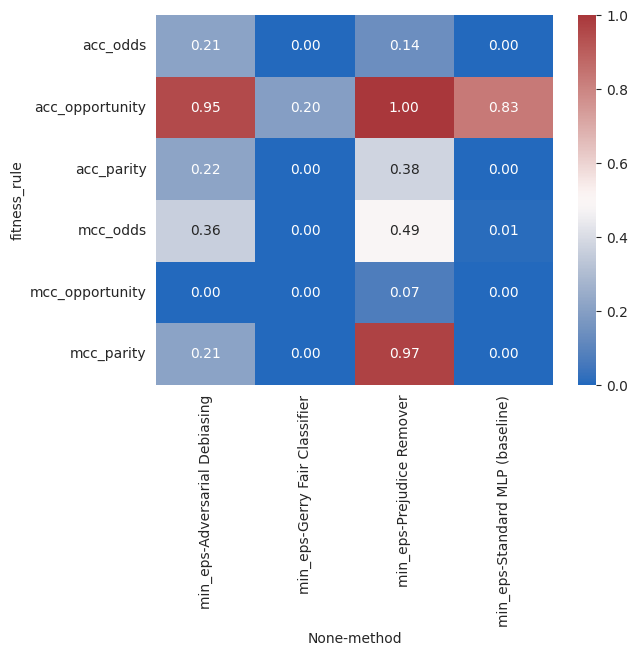

In [101]:
print("Aso for dataset", datasets[0])
aso = pd.DataFrame(aso_data_list[0])
sns.heatmap(aso.pivot(columns='method', index='fitness_rule'), annot=True, fmt='.2f', cmap='vlag')


Aso for dataset Compas Recidivism


<Axes: xlabel='None-method', ylabel='fitness_rule'>

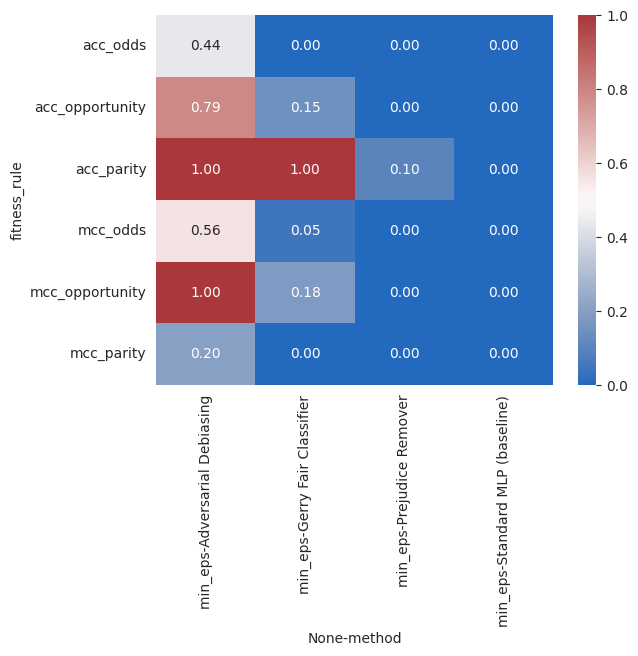

In [102]:
print("Aso for dataset", datasets[1])
aso = pd.DataFrame(aso_data_list[1])
sns.heatmap(aso.pivot(columns='method', index='fitness_rule'), annot=True, fmt='.2f', cmap='vlag')

In [33]:
multi_aso_data_list = []
for d in datasets:
    multi_aso_data = []
    for f in fitness_rules:
        methods_results = []
        for m in methods:
            r = results.loc[ (results['dataset'] == d) &
                                 (results['fitness_rule'] == f) &
                                 (results['method'] == m) ]\
                        .fitness.tolist()
            if len(r) == 0:
                r = [-1]
            methods_results.append(r)
        min_eps = deepsig.multi_aso(methods_results, confidence_level=0.95)
        multi_aso_data_list.append({'fitness_rule': f, 'dataset': d, 'min_eps': min_eps})



Model comparisons:   0%|          | 0/10000 [00:00<?, ?it/s]

Model comparisons:   0%|          | 6/10000 [00:00<02:53, 57.56it/s]

Model comparisons:   0%|          | 13/10000 [00:00<02:46, 60.12it/s]

Model comparisons:   0%|          | 20/10000 [00:00<03:11, 52.16it/s]

Model comparisons:   0%|          | 26/10000 [00:00<03:16, 50.75it/s]

Model comparisons:   0%|          | 33/10000 [00:00<03:00, 55.13it/s]

Model comparisons:   0%|          | 40/10000 [00:00<02:51, 58.01it/s]

Model comparisons:   0%|          | 47/10000 [00:00<02:46, 59.76it/s]

Model comparisons:   1%|          | 54/10000 [00:00<02:59, 55.53it/s]

Model comparisons:   1%|          | 61/10000 [00:01<02:47, 59.23it/s]

Model comparisons:   1%|          | 68/10000 [00:01<02:42, 61.12it/s]

Model comparisons:   1%|          | 75/10000 [00:01<02:36, 63.52it/s]

Model comparisons:   1%|          | 82/10000 [00:01<02:43, 60.70it/s]

Model comparisons:   1%|          | 89/10000 [00:01<02:42, 61.12it/s]

Model comparis

In [40]:
for aso_result in sorted(multi_aso_data_list, key=lambda x: x['fitness_rule']):
    fitness_rule = aso_result['fitness_rule']
    dataset = aso_result['dataset']
    metrics = fitness_rules_target_metrics[fitness_rule]
    subset_results = results.loc[ (results.fitness_rule == fitness_rule) \
                                      & (results.dataset == dataset) ]

    grouped_results = subset_results\
        .groupby(['method'])\
        .agg({'fitness': ['mean', 'std','count'], metrics['performance']: ['mean', 'std'], metrics['fairness']: ['mean', 'std']})\
        .sort_values(by=('fitness','mean'), ascending=False)

    aso_df = pd.DataFrame(aso_result['min_eps'], columns=methods)
    aso_df['methods'] = methods
    aso_df = aso_df.set_index('methods')

    print('%s | max(%s - %s)' % (dataset, metrics['performance'], metrics['fairness']))
    display(grouped_results)
    print('Significance Testing')
    display(aso_df)

Adult Income | max(Accuracy - Equalized Odds)


fitness                  Accuracy            \
                             mean       std count      mean       std   
method                                                                  
Fair Transition Loss     0.807825  0.017309    15  0.842270  0.006409   
Adversarial Debiasing    0.796482  0.013597    15  0.848764  0.003349   
Prejudice Remover        0.793973  0.017261    15  0.844960  0.005480   
Standard MLP (baseline)  0.765316  0.017537    16  0.849627  0.003754   
Gerry Fair Classifier    0.654975  0.197797    15  0.713787  0.212745   

                        Equalized Odds            
                                  mean       std  
method                                            
Fair Transition Loss          0.034445  0.017407  
Adversarial Debiasing         0.052282  0.013394  
Prejudice Remover             0.050987  0.014133  
Standard MLP (baseline)       0.084311  0.017112  
Gerry Fair Classifier         0.058811  0.041480

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,0.999251,0.996903,1.000000,0.020528
Fair Transition Loss,0.009202,1.000000,0.221805,0.177648,0.000000
Adversarial Debiasing,0.016373,1.000000,1.000000,0.665120,0.000000
Prejudice Remover,0.012967,1.000000,1.000000,1.000000,0.000000
Gerry Fair Classifier,1.000000,1.000000,1.000000,1.000000,1.000000


Compas Recidivism | max(Accuracy - Equalized Odds)


fitness                  Accuracy            \
                             mean       std count      mean       std   
method                                                                  
Fair Transition Loss     0.571804  0.028527    15  0.630632  0.040140   
Adversarial Debiasing    0.552610  0.094035    15  0.668504  0.013186   
Gerry Fair Classifier    0.518907  0.037400    15  0.624203  0.054904   
Prejudice Remover        0.264117  0.027071    15  0.356888  0.013023   
Standard MLP (baseline)  0.154593  0.043940    15  0.349919  0.015081   

                        Equalized Odds            
                                  mean       std  
method                                            
Fair Transition Loss          0.058828  0.033938  
Adversarial Debiasing         0.115893  0.090752  
Gerry Fair Classifier         0.105296  0.053737  
Prejudice Remover             0.092771  0.020648  
Standard MLP (baseline)       0.195326  0.044006

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,0.995419,1.0000,0.995053,0.996292
Fair Transition Loss,0.006591,1.000000,0.4446,0.000000,0.002519
Adversarial Debiasing,0.003495,1.000000,1.0000,0.000000,0.707137
Prejudice Remover,0.013390,1.000000,1.0000,1.000000,0.997696
Gerry Fair Classifier,0.006126,1.000000,1.0000,0.004538,1.000000


German Credit | max(Accuracy - Equalized Odds)


fitness                 Accuracy            \
                             mean       std count     mean       std   
method                                                                 
Fair Transition Loss     0.691439  0.071575     5    0.702  0.050324   
Prejudice Remover        0.496824  0.075326     5    0.596  0.024850   
Standard MLP (baseline)  0.474556  0.044228     5    0.605  0.028062   
Adversarial Debiasing    0.327735  0.348525     5    0.676  0.116103   

                        Equalized Odds            
                                  mean       std  
method                                            
Fair Transition Loss          0.010561  0.023614  
Prejudice Remover             0.099176  0.059317  
Standard MLP (baseline)       0.130444  0.058071  
Adversarial Debiasing         0.348265  0.253472

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,1.0,0.483056,1.000000,0.0
Fair Transition Loss,0.004800,1.0,0.073424,0.007572,0.0
Adversarial Debiasing,1.000000,1.0,1.000000,1.000000,0.0
Prejudice Remover,0.633342,1.0,0.435991,1.000000,0.0
Gerry Fair Classifier,1.000000,1.0,1.000000,1.000000,1.0


Adult Income | max(Accuracy - Equal Opportunity)


fitness                  Accuracy            \
                             mean       std count      mean       std   
method                                                                  
Prejudice Remover        0.809534  0.022701    13  0.845788  0.003691   
Fair Transition Loss     0.787013  0.083934    15  0.825826  0.069484   
Adversarial Debiasing    0.756054  0.028345    14  0.847730  0.002904   
Standard MLP (baseline)  0.752260  0.041790    15  0.849309  0.003078   
Gerry Fair Classifier    0.655568  0.185910    13  0.720083  0.212767   

                        Equal Opportunity            
                                     mean       std  
method                                               
Prejudice Remover                0.036254  0.021244  
Fair Transition Loss             0.038813  0.037378  
Adversarial Debiasing            0.091676  0.027315  
Standard MLP (baseline)          0.097049  0.042438  
Gerry Fair Classifier            0.064516  0.051427

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,1.000000,0.887554,1.0,0.073527
Fair Transition Loss,0.889945,1.000000,0.968213,1.0,0.174828
Adversarial Debiasing,1.000000,1.000000,1.000000,1.0,0.018357
Prejudice Remover,0.041493,0.461181,0.009451,1.0,0.000000
Gerry Fair Classifier,1.000000,1.000000,1.000000,1.0,1.000000


Compas Recidivism | max(Accuracy - Equal Opportunity)


fitness                  Accuracy            \
                             mean       std count      mean       std   
method                                                                  
Fair Transition Loss     0.594341  0.036989    15  0.647920  0.013005   
Adversarial Debiasing    0.594049  0.065326    15  0.671907  0.017399   
Gerry Fair Classifier    0.551639  0.061398    15  0.616532  0.073965   
Prejudice Remover        0.286772  0.032081    15  0.342247  0.011975   
Standard MLP (baseline)  0.217957  0.051457    15  0.352998  0.013016   

                        Equal Opportunity            
                                     mean       std  
method                                               
Fair Transition Loss             0.053579  0.032860  
Adversarial Debiasing            0.077858  0.064096  
Gerry Fair Classifier            0.064892  0.037954  
Prejudice Remover                0.055476  0.034565  
Standard MLP (baseline)          0.135041  0.048740

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,0.994856,0.997965,0.995050,0.996570
Fair Transition Loss,0.008971,1.000000,0.798755,0.000000,0.092379
Adversarial Debiasing,0.006264,1.000000,1.000000,0.000000,0.278514
Prejudice Remover,0.032717,1.000000,1.000000,1.000000,0.998100
Gerry Fair Classifier,0.007465,1.000000,1.000000,0.004053,1.000000


German Credit | max(Accuracy - Equal Opportunity)


fitness                 Accuracy            \
                             mean       std count     mean       std   
method                                                                 
Fair Transition Loss     0.682103  0.073677     5    0.701  0.043789   
Standard MLP (baseline)  0.506573  0.084722     5    0.598  0.050200   
Adversarial Debiasing    0.495682  0.173665     5    0.713  0.080047   
Prejudice Remover        0.459040  0.111442     5    0.576  0.020433   

                        Equal Opportunity            
                                     mean       std  
method                                               
Fair Transition Loss             0.018897  0.032586  
Standard MLP (baseline)          0.091427  0.051562  
Adversarial Debiasing            0.217318  0.105582  
Prejudice Remover                0.116960  0.102355

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,1.0,0.811836,0.576109,0.0
Fair Transition Loss,0.013879,1.0,0.084487,0.000493,0.0
Adversarial Debiasing,1.000000,1.0,1.000000,0.909660,0.0
Prejudice Remover,1.000000,1.0,1.000000,1.000000,0.0
Gerry Fair Classifier,1.000000,1.0,1.000000,1.000000,1.0


Adult Income | max(Accuracy - Statistical Parity)


fitness                  Accuracy            \
                             mean       std count      mean       std   
method                                                                  
Fair Transition Loss     0.813556  0.010233    16  0.827785  0.007240   
Adversarial Debiasing    0.807533  0.008959    16  0.829657  0.005835   
Prejudice Remover        0.807014  0.014847    16  0.824848  0.004380   
Standard MLP (baseline)  0.666467  0.012829    16  0.850663  0.004163   
Gerry Fair Classifier    0.526329  0.229352    16  0.600539  0.285115   

                        Statistical Parity            
                                      mean       std  
method                                                
Fair Transition Loss              0.014229  0.009873  
Adversarial Debiasing             0.022124  0.010258  
Prejudice Remover                 0.017834  0.013943  
Standard MLP (baseline)           0.184197  0.011589  
Gerry Fair Classifier             0.074210  0.079207

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,0.995063,0.994889,0.996408,0.041633
Fair Transition Loss,0.006253,1.000000,0.267856,0.292014,0.000000
Adversarial Debiasing,0.006408,1.000000,1.000000,0.638918,0.000000
Prejudice Remover,0.005574,1.000000,1.000000,1.000000,0.000000
Gerry Fair Classifier,1.000000,1.000000,1.000000,1.000000,1.000000


Compas Recidivism | max(Accuracy - Statistical Parity)


fitness                  Accuracy            \
                             mean       std count      mean       std   
method                                                                  
Adversarial Debiasing    0.537701  0.072416    15  0.670070  0.015980   
Fair Transition Loss     0.501417  0.151259    15  0.600000  0.047615   
Gerry Fair Classifier    0.482351  0.038079    15  0.595624  0.085296   
Prejudice Remover        0.307630  0.028754    15  0.359265  0.013230   
Standard MLP (baseline)  0.145627  0.032556    15  0.354025  0.017277   

                        Statistical Parity            
                                      mean       std  
method                                                
Adversarial Debiasing             0.132370  0.081590  
Fair Transition Loss              0.098583  0.143214  
Gerry Fair Classifier             0.113273  0.072172  
Prejudice Remover                 0.051635  0.023966  
Standard MLP (baseline)           0.208397  0.024309

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,1.000000,0.997678,0.996748,0.996390
Fair Transition Loss,0.002081,1.000000,1.000000,0.102016,1.000000
Adversarial Debiasing,0.003967,0.515778,1.000000,0.000000,0.061438
Prejudice Remover,0.005907,1.000000,1.000000,1.000000,0.997277
Gerry Fair Classifier,0.004948,0.811378,1.000000,0.005261,1.000000


German Credit | max(Accuracy - Statistical Parity)


fitness                 Accuracy            \
                             mean       std count     mean       std   
method                                                                 
Adversarial Debiasing    0.643648  0.076411     5    0.758  0.024135   
Fair Transition Loss     0.636619  0.128621     5    0.679  0.054245   
Prejudice Remover        0.450203  0.018152     5    0.587  0.028417   
Standard MLP (baseline)  0.441727  0.048572     5    0.586  0.029026   

                        Statistical Parity            
                                      mean       std  
method                                                
Adversarial Debiasing             0.114352  0.075769  
Fair Transition Loss              0.042381  0.077489  
Prejudice Remover                 0.136797  0.025781  
Standard MLP (baseline)           0.144273  0.046457

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,1.000000,0.998645,1.000000,0.0
Fair Transition Loss,0.062079,1.000000,1.000000,0.021219,0.0
Adversarial Debiasing,0.006848,0.905159,1.000000,0.000000,0.0
Prejudice Remover,1.000000,1.000000,1.000000,1.000000,0.0
Gerry Fair Classifier,1.000000,1.000000,1.000000,1.000000,1.0


Adult Income | max(Mathew Correlation - Equalized Odds)


fitness                 Mathew Correlation  \
                             mean       std count               mean   
method                                                                 
Fair Transition Loss     0.523425  0.020328    16           0.575880   
Prejudice Remover        0.508792  0.049072    16           0.557913   
Adversarial Debiasing    0.508718  0.030129    16           0.564504   
Standard MLP (baseline)  0.489029  0.031826    16           0.575790   
Gerry Fair Classifier    0.403599  0.068466    16           0.503477   

                                  Equalized Odds            
                              std           mean       std  
method                                                      
Fair Transition Loss     0.019230       0.052455  0.015316  
Prejudice Remover        0.020503       0.049121  0.029543  
Adversarial Debiasing    0.015855       0.055786  0.017017  
Standard MLP (baseline)  0.010824       0.086761  0.025333  
Gerry Fair Classifier    0.039191       0.099878  0.034109

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,1.0,1.000000,1.000000,0.000000
Fair Transition Loss,0.034173,1.0,0.265174,0.418150,0.000000
Adversarial Debiasing,0.280245,1.0,1.000000,0.786584,0.000000
Prejudice Remover,0.882820,1.0,1.000000,1.000000,0.050296
Gerry Fair Classifier,1.000000,1.0,1.000000,1.000000,1.000000


Compas Recidivism | max(Mathew Correlation - Equalized Odds)


fitness                 Mathew Correlation  \
                             mean       std count               mean   
method                                                                 
Fair Transition Loss     0.208479  0.058105    15           0.282652   
Adversarial Debiasing    0.191345  0.110034    15           0.324271   
Gerry Fair Classifier    0.150205  0.059268    15           0.269140   
Prejudice Remover       -0.351727  0.032756    15          -0.278298   
Standard MLP (baseline) -0.470693  0.048406    15          -0.294316   

                                  Equalized Odds            
                              std           mean       std  
method                                                      
Fair Transition Loss     0.024903       0.074173  0.046962  
Adversarial Debiasing    0.034796       0.132926  0.096137  
Gerry Fair Classifier    0.073869       0.118935  0.042625  
Prejudice Remover        0.020505       0.073429  0.025640  
Standard MLP (baseline)  0.016584       0.176377  0.042590

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,0.99587,0.997890,0.998315,0.997010
Fair Transition Loss,0.005346,1.00000,0.584943,0.000000,0.062150
Adversarial Debiasing,0.003974,1.00000,1.000000,0.000000,0.570304
Prejudice Remover,0.010010,1.00000,1.000000,1.000000,0.997739
Gerry Fair Classifier,0.004957,1.00000,1.000000,0.004838,1.000000


German Credit | max(Mathew Correlation - Equalized Odds)


fitness                 Mathew Correlation  \
                             mean       std count               mean   
method                                                                 
Adversarial Debiasing    0.098523  0.443034     5           0.336767   
Prejudice Remover       -0.054850  0.016538     5           0.000000   
Standard MLP (baseline) -0.119958  0.041873     5           0.000000   
Fair Transition Loss    -0.292185  0.274708     5           0.000000   

                                  Equalized Odds            
                              std           mean       std  
method                                                      
Adversarial Debiasing    0.129542       0.238245  0.321641  
Prejudice Remover        0.000000       0.054850  0.016538  
Standard MLP (baseline)  0.000000       0.119958  0.041873  
Fair Transition Loss     0.000000       0.292185  0.274708

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,0.282944,1.0,1.000000,0.0
Fair Transition Loss,1.000000,1.000000,1.0,1.000000,0.0
Adversarial Debiasing,0.670909,0.272065,1.0,0.873768,0.0
Prejudice Remover,0.056453,0.160763,1.0,1.000000,0.0
Gerry Fair Classifier,1.000000,1.000000,1.0,1.000000,1.0


Adult Income | max(Mathew Correlation - Equal Opportunity)


fitness                 Mathew Correlation  \
                             mean       std count               mean   
method                                                                 
Fair Transition Loss     0.555629  0.028296    16           0.584309   
Prejudice Remover        0.504880  0.090917    16           0.559953   
Adversarial Debiasing    0.492795  0.052210    16           0.572624   
Standard MLP (baseline)  0.488503  0.029460    16           0.579698   
Gerry Fair Classifier    0.383114  0.103134    16           0.481545   

                                  Equal Opportunity            
                              std              mean       std  
method                                                         
Fair Transition Loss     0.011226          0.028680  0.027219  
Prejudice Remover        0.019364          0.055074  0.075105  
Adversarial Debiasing    0.010513          0.079829  0.045796  
Standard MLP (baseline)  0.010412          0.091195  0.029729  
Gerry Fair Classifier    0.127041          0.098431  0.041765

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,0.997495,0.970828,0.872981,0.000000
Fair Transition Loss,0.008456,1.000000,0.000654,0.048704,0.000000
Adversarial Debiasing,1.000000,1.000000,1.000000,0.920327,0.000366
Prejudice Remover,1.000000,1.000000,1.000000,1.000000,0.163261
Gerry Fair Classifier,1.000000,1.000000,1.000000,1.000000,1.000000


Compas Recidivism | max(Mathew Correlation - Equal Opportunity)


fitness                 Mathew Correlation  \
                             mean       std count               mean   
method                                                                 
Adversarial Debiasing    0.258418  0.052592    15           0.328905   
Fair Transition Loss     0.213496  0.058243    15           0.263713   
Gerry Fair Classifier    0.166407  0.052726    15           0.264071   
Prejudice Remover       -0.319029  0.031000    15          -0.289144   
Standard MLP (baseline) -0.435498  0.034788    15          -0.292278   

                                  Equal Opportunity            
                              std              mean       std  
method                                                         
Adversarial Debiasing    0.025563          0.070487  0.050916  
Fair Transition Loss     0.060744          0.050218  0.029355  
Gerry Fair Classifier    0.053928          0.097664  0.038141  
Prejudice Remover        0.027507          0.029885  0.021920  
Standard MLP (baseline)  0.021478          0.143220  0.031957

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,0.996917,0.996164,0.995488,0.996800
Fair Transition Loss,0.004853,1.000000,1.000000,0.000000,0.188522
Adversarial Debiasing,0.004885,0.158001,1.000000,0.000000,0.001112
Prejudice Remover,0.008766,1.000000,1.000000,1.000000,0.997463
Gerry Fair Classifier,0.004809,1.000000,1.000000,0.004386,1.000000


German Credit | max(Mathew Correlation - Equal Opportunity)


fitness                 Mathew Correlation  \
                             mean       std count               mean   
method                                                                 
Adversarial Debiasing    0.198468  0.300610     5           0.339415   
Fair Transition Loss    -0.003604  0.008058     5           0.000000   
Standard MLP (baseline) -0.102497  0.094651     5           0.000000   
Prejudice Remover       -0.127433  0.080586     5           0.000000   

                                  Equal Opportunity            
                              std              mean       std  
method                                                         
Adversarial Debiasing    0.084459          0.140947  0.232102  
Fair Transition Loss     0.000000          0.003604  0.008058  
Standard MLP (baseline)  0.000000          0.102497  0.094651  
Prejudice Remover        0.000000          0.127433  0.080586

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,1.000000,1.0,0.679153,0.0
Fair Transition Loss,0.062277,1.000000,1.0,0.000163,0.0
Adversarial Debiasing,0.178052,0.485408,1.0,0.136132,0.0
Prejudice Remover,1.000000,1.000000,1.0,1.000000,0.0
Gerry Fair Classifier,1.000000,1.000000,1.0,1.000000,1.0


Adult Income | max(Mathew Correlation - Statistical Parity)


fitness                 Mathew Correlation  \
                             mean       std count               mean   
method                                                                 
Fair Transition Loss     0.492021  0.016387    16           0.512027   
Prejudice Remover        0.490575  0.008865    16           0.500024   
Adversarial Debiasing    0.477586  0.014882    16           0.501430   
Standard MLP (baseline)  0.395355  0.012556    17           0.580617   
Gerry Fair Classifier    0.304991  0.128019    16           0.453065   

                                  Statistical Parity            
                              std               mean       std  
method                                                          
Fair Transition Loss     0.010737           0.020006  0.010913  
Prejudice Remover        0.008227           0.009449  0.009857  
Adversarial Debiasing    0.020095           0.023844  0.022968  
Standard MLP (baseline)  0.008613           0.185263  0.010419  
Gerry Fair Classifier    0.173689           0.148074  0.080770

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,0.998817,0.998015,0.995897,0.0
Fair Transition Loss,0.004556,1.000000,0.169157,1.000000,0.0
Adversarial Debiasing,0.004980,1.000000,1.000000,1.000000,0.0
Prejudice Remover,0.005978,1.000000,0.104966,1.000000,0.0
Gerry Fair Classifier,1.000000,1.000000,1.000000,1.000000,1.0


Compas Recidivism | max(Mathew Correlation - Statistical Parity)


fitness                 Mathew Correlation  \
                             mean       std count               mean   
method                                                                 
Fair Transition Loss     0.219648  0.060505    15           0.276319   
Adversarial Debiasing    0.156659  0.143556    15           0.322097   
Gerry Fair Classifier    0.114192  0.047612    15           0.245784   
Prejudice Remover       -0.318189  0.052017    15          -0.275734   
Standard MLP (baseline) -0.511081  0.048197    15          -0.299095   

                                  Statistical Parity            
                              std               mean       std  
method                                                          
Fair Transition Loss     0.027969           0.056671  0.045211  
Adversarial Debiasing    0.015693           0.165438  0.135798  
Gerry Fair Classifier    0.093050           0.131592  0.057941  
Prejudice Remover        0.029641           0.042455  0.027919  
Standard MLP (baseline)  0.029404           0.211986  0.039521

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,0.996364,1.000000,0.997045,0.997001
Fair Transition Loss,0.005114,1.000000,0.233189,0.000000,0.002496
Adversarial Debiasing,0.003221,1.000000,1.000000,0.000000,0.775445
Prejudice Remover,0.006192,1.000000,1.000000,1.000000,0.997673
Gerry Fair Classifier,0.005389,1.000000,1.000000,0.005671,1.000000


German Credit | max(Mathew Correlation - Statistical Parity)


fitness                 Mathew Correlation  \
                             mean       std count               mean   
method                                                                 
Adversarial Debiasing    0.295358  0.081531     5           0.409382   
Fair Transition Loss    -0.018140  0.026166     5           0.000000   
Standard MLP (baseline) -0.070983  0.046302     5           0.000000   
Prejudice Remover       -0.125173  0.048720     5           0.000000   

                                  Statistical Parity            
                              std               mean       std  
method                                                          
Adversarial Debiasing    0.029627           0.114024  0.052332  
Fair Transition Loss     0.000000           0.018140  0.026166  
Standard MLP (baseline)  0.000000           0.070983  0.046302  
Prejudice Remover        0.000000           0.125173  0.048720

Significance Testing


,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,1.000000,0.997318,0.226512,0.0
Fair Transition Loss,0.145529,1.000000,0.997795,0.000000,0.0
Adversarial Debiasing,0.005519,0.005052,1.000000,0.000000,0.0
Prejudice Remover,1.000000,1.000000,1.000000,1.000000,0.0
Gerry Fair Classifier,1.000000,1.000000,1.000000,1.000000,1.0


In [36]:
methods_results = []
for m in methods:
    r = results.loc[ (results['method'] == m) ]\
                .fitness.tolist()
    if len(r) == 0:
        r = [-1]
    methods_results.append(r)
min_eps = deepsig.multi_aso(methods_results, confidence_level=0.95)





Model comparisons:   0%|          | 0/10000 [00:00<?, ?it/s]


Model comparisons:   0%|          | 3/10000 [00:00<06:39, 25.00it/s]


Model comparisons:   0%|          | 6/10000 [00:00<06:55, 24.06it/s]


Model comparisons:   0%|          | 9/10000 [00:00<07:07, 23.37it/s]


Model comparisons:   0%|          | 12/10000 [00:00<06:41, 24.87it/s]


Model comparisons:   0%|          | 15/10000 [00:00<06:21, 26.19it/s]


Model comparisons:   0%|          | 18/10000 [00:00<06:15, 26.59it/s]


Model comparisons:   0%|          | 21/10000 [00:00<06:08, 27.07it/s]


Model comparisons:   0%|          | 24/10000 [00:00<06:02, 27.54it/s]


Model comparisons:   0%|          | 27/10000 [00:01<06:08, 27.04it/s]


Model comparisons:   0%|          | 30/10000 [00:01<06:06, 27.21it/s]


Model comparisons:   0%|          | 33/10000 [00:01<06:02, 27.48it/s]


Model comparisons:   0%|          | 36/10000 [00:01<05:58, 27.81it/s]


Model comparisons:   0%|          | 39/10000 [00:01<05:57, 27.88it/s]


M

In [37]:
aso_df = pd.DataFrame(min_eps, columns=methods)
aso_df['methods'] = methods
aso_df = aso_df.set_index('methods')
aso_df

,Standard MLP (baseline),Fair Transition Loss,Adversarial Debiasing,Prejudice Remover,Gerry Fair Classifier
methods,,,,,
Standard MLP (baseline),1.000000,1.000000,1.0,1.000000,0.995384
Fair Transition Loss,0.009028,1.000000,1.0,0.008844,0.272921
Adversarial Debiasing,0.009464,0.872271,1.0,0.012684,0.202205
Prejudice Remover,0.377673,1.000000,1.0,1.000000,1.000000
Gerry Fair Classifier,0.037425,1.000000,1.0,0.116700,1.000000
